Logistic Regression with a Neural Network mindset
====
Welcome to your first (required) programming assignment! You will build a logistic regression classifier to recognize cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

Instructions:
----
do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.<br>
<br>


You will learn to:
----
Build the general architecture of a learning algorithm, including:<br>
+ Initializing parameters<br>
+ Calculating the cost function and its gradient<br>
+ Using an optimization algorithm (gradient descent)<br>
+ Gather all three functions above into a main model function, in the right order.

1 - Packages
----
First, let's run the cell below to import all the packages that you will need during this assignment.

* numpy is the fundamental package for scientific computing with Python.<br>
* h5py is a common package to interact with a dataset that is stored on an H5 file.<br>
* matplotlib is a famous library to plot graphs in Python.<br>
* PIL and scipy are used here to test your model with your own picture at the end.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
# 读取数据
def load_dataset():
    with h5py.File('datasets/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('datasets/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

2 - Overview of the Problem set
Problem Statement: You are given a dataset ("data.h5") containing:

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [88]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# We added "_orig" at the end of image datasets (train and test)
# because we are going to preprocess them.
# After preprocessing, we will end up with train_set_x and test_set_x
# (the labels train_set_y and test_set_y don't need any preprocessing).

# train_set_x_orig (209.64.64,3)
# train_set_y (1,209)
# test_set_x_orig (50,64,64,3)
# test_set_y (1,50)
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

y = [1], it's a 'cat' picture.


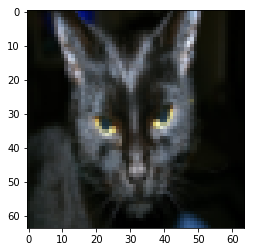

In [89]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].\
       decode("utf-8") +  "' picture.")

TASK 1

For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array
 where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise**: Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px $*$ num_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:

        X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X


In [90]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print("Train sets shape: ", train_set_x_flatten.shape)
print("Test sets shape: ", train_set_x_flatten.shape)

# standardize by dividing 255 (255 RGM Colors)
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

Train sets shape:  (12288, 209)
Test sets shape:  (12288, 209)


3 - General Architecture of the learning algorithm
====
Logistic Regreesion:  <br>

$z(i) = w^T * X + b$ <br>
$\hat{y} = sigmod(Z(i))$ <br>
$L(y, \hat{y}) = -y(i) * log(\hat{y}) - (1-y(i)) * log(1-\hat{y}) $ <br>
%J(y, \hat{y}) = 1/m * sum(L(y, \hat{y}))%

steps:
----
- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

In [91]:
# Using your code from "Python Basics", implement sigmoid().
# As you've seen in the figure above, you need to compute $sigmoid( w^T x + b)$ to make predictions.
def sigmoid(z):
    return 1/(1+np.exp(-z))

print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


In [92]:
# Implement parameter initialization in the cell below.
# You have to initialize w as a vector of zeros.

def initialize_with_zeros(dim):
    """
    :param dim: refers to the dimensions of vector w (dim, 1)
    :return: parameters w, b
    """
    w = np.zeros(dim).reshape(dim, 1)
    b = 0
    assert (w.shape==(dim, 1))
    assert (isinstance(b, float) or isinstance(b, int))
    return w, b

# test:

w, b = initialize_with_zeros(2)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


4 - Forward and Backward propagation¶
====
Exercise: Implement a function propagate() that computes the cost function and its gradient.
Forward Propagation:

You get X
You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$


In [93]:
def propagate(w, b, X, Y):
    """

    :param w: weights
    :param b: bias
    :param X: data
    :param Y: labels
    :return: grads {} ; cost
    """

    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b) # forward propagation
    cost = (- 1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum((A-Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw, "db": db}
    return grads, cost


In [94]:
# test:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


d) Optimization
You have initialized your parameters. <br>
You are also able to compute a cost function and its gradient. <br>
Now, you want to update the parameters using gradient descent.

In [95]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    cur = 0
    while cur < num_iterations:
        iter_grads, iter_cost = propagate(w,b,X,Y)
        dw = iter_grads['dw']
        db = iter_grads['db']
        # use gradient descent methods:
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # store cost and enter next iteration
        costs.append(iter_cost)
        # print cost every 100 iterations:
        if cur % 100 == 0:
            print("[%s of %s]: current cost is %s " %(cur, num_iterations, iter_cost))
        cur+=1

    params = {"w": w,
              "b": b}

    grads = {"dw":dw, "db":db}

    return params, grads, costs

# test
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.009, print_cost = False)
print(params)

[0 of 1000]: current cost is 6.000064773192205 
[100 of 1000]: current cost is 1.4313999565615696 
[200 of 1000]: current cost is 0.5554617961544774 
[300 of 1000]: current cost is 0.5391805662202398 
[400 of 1000]: current cost is 0.5246238207538814 
[500 of 1000]: current cost is 0.5106492233396783 
[600 of 1000]: current cost is 0.49722953462440267 
[700 of 1000]: current cost is 0.4843396735082923 
[800 of 1000]: current cost is 0.4719555813859543 
[900 of 1000]: current cost is 0.460054211080552 
{'w': array([[-0.98731056],
       [-0.19170416]]), 'b': 1.8978031995333131}


Exercise: The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function. There is two steps to computing predictions:

Calculate $\hat{Y} = A = \sigma(w^T X + b)$

Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).


In [96]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    assert(Y_prediction.shape == (1, m))
    return Y_prediction

print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [97]:
_w, _b = initialize_with_zeros(train_set_x.shape[0])

In [99]:
def lr_nn(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    # 1 init
    _w, _b = initialize_with_zeros(X_train.shape[0])
    # 2 gradients descent
    params, grads, costs = optimize(_w, _b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    # 3 predict
    w , b = params["w"] , params["b"]
    Y_outsample = predict(w, b, X_test)
    Y_insample  = predict(w, b, X_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(Y_insample - Y_train)) * 100))
    print("test accurace: {} %".format (
        100 - np.mean(np.abs(Y_outsample - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_outsample,
         "Y_prediction_train" : Y_insample,
         "w" : params["w"],
         "b" : params["b"],
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

# try out models:
d = lr_nn(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

[0 of 2000]: current cost is 0.6931471805599453 
[100 of 2000]: current cost is 0.5845083636993085 
[200 of 2000]: current cost is 0.4669490409465547 
[300 of 2000]: current cost is 0.37600686694802077 
[400 of 2000]: current cost is 0.3314632893282512 
[500 of 2000]: current cost is 0.303273067474383 
[600 of 2000]: current cost is 0.27987958658260487 
[700 of 2000]: current cost is 0.2600421369258757 
[800 of 2000]: current cost is 0.2429406846779662 
[900 of 2000]: current cost is 0.22800422256726066 
[1000 of 2000]: current cost is 0.2148195137844964 
[1100 of 2000]: current cost is 0.20307819060644985 
[1200 of 2000]: current cost is 0.1925442771670686 
[1300 of 2000]: current cost is 0.18303333796883509 
[1400 of 2000]: current cost is 0.17439859438448876 
[1500 of 2000]: current cost is 0.16652139705400335 
[1600 of 2000]: current cost is 0.15930451829756614 
[1700 of 2000]: current cost is 0.152667324712965 
[1800 of 2000]: current cost is 0.1465422350398234 
[1900 of 2000]: cu